<a href="https://colab.research.google.com/github/iamttom/iamttom/blob/main/Pr%C3%A1tica_convers%C3%A3oII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd

# Abrir o arquivo XML
with open('/content/Profissão Analista de dados M13 Exercicio estado-bruto.xml', 'r', encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'lxml')

# Encontrar todos os elementos <ESTADO>
estados = soup.find_all('estado')

# Extrair os dados desejados
dados = []
for estado in estados:
    nome = estado.find('nome').text.strip()
    sigla = estado.find('sigla').text.strip()
    regiao = estado.find('regiao').text.strip()
    dados.append([nome, sigla, regiao])

# Criar DataFrame
df_estados = pd.DataFrame(dados, columns=['estado', 'sigla', 'região'])

# Salvar como CSV separado por ";"
df_estados.to_csv('estados-limpo.csv', sep=';', index=False)

# Visualizar as 5 primeiras linhas
df_estados.head()


<ipython-input-1-4168997743>:6: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup = BeautifulSoup(file, 'lxml')


,estado,sigla,região
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE
2,AMAPA,AP,NORTE
3,AMAZONAS,AM,NORTE
4,BAHIA,BA,NORDESTE


In [ ]:
import pandas as pd

# Ler o arquivo CSV original
df_cidades = pd.read_csv('/content/cidades-bruto.csv')

# Exibir as primeiras colunas para identificação (opcional)
print("Colunas disponíveis:", df_cidades.columns.tolist())

# Filtrar apenas os dados do censo de 2010
df_cidades_2010 = df_cidades[df_cidades['Censo'] == 2010]

# Selecionar e renomear as colunas
colunas_desejadas = {
    'UF': 'estado',
    'nome': 'cidade',
    'Pop_est_2009': 'população',
    'PIB': 'pib',
    'PIB_percapita': 'pib_percapita'
}

df_cidades_limpo = df_cidades_2010[list(colunas_desejadas.keys())].rename(columns=colunas_desejadas)

# Salvar o resultado como CSV separado por ";"
df_cidades_limpo.to_csv('cidades-limpo.csv', sep=';', index=False)

# Visualizar algumas linhas
df_cidades_limpo.head()

Colunas disponíveis: ['FID', 'gid', 'UF', 'nome', 'Censo', 'PIB', 'Pop_est_2009', 'PIB_percapita', 'Descrição', 'legenda', 'classe', 'geom']


,estado,cidade,população,pib,pib_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000


In [ ]:
import pandas as pd

# Carregar os arquivos limpos
df_estados = pd.read_csv('estados-limpo.csv', sep=';')
df_cidades = pd.read_csv('cidades-limpo.csv', sep=';')

# Corrigir inconsistências nos nomes dos estados (ex: maiúsculas, acentos)
df_estados['estado'] = df_estados['estado'].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_cidades['estado'] = df_cidades['estado'].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Fazer o merge entre os dataframes
df_brasil = pd.merge(df_cidades, df_estados, on='estado', how='left')

# Verificar se há valores faltantes após o merge
print("Valores nulos por coluna após merge:")
print(df_brasil.isnull().sum())

# Salvar em CSV separado por ;
df_brasil.to_csv('brasil.csv', sep=';', index=False)

# Visualizar algumas linhas
df_brasil.head()


Valores nulos por coluna após merge:
estado           0
cidade           0
população        0
pib              0
pib_percapita    0
sigla            0
região           0
dtype: int64


,estado,cidade,população,pib,pib_percapita,sigla,região
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727,RS,SUL
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844,ES,SUDESTE
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961,MG,SUDESTE
4,PIAUI,Nazária,7895,2.095138e+04,2653.750000,PI,NORDESTE


In [ ]:
import pandas as pd

# Carregando o arquivo brasil.csv
brasil_df = pd.read_csv('brasil.csv', sep=';')

# Exibir as primeiras linhas
brasil_df.head()


,estado,cidade,população,pib,pib_percapita,sigla,região
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727,RS,SUL
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844,ES,SUDESTE
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961,MG,SUDESTE
4,PIAUI,Nazária,7895,2.095138e+04,2653.750000,PI,NORDESTE


In [ ]:
brasil_df.nlargest(10, 'população')[['cidade', 'estado', 'população']]


,cidade,estado,população
4921,São Paulo,SAO PAULO,11037593
785,Rio de Janeiro,RIO DE JANEIRO,6186710
519,Salvador,BAHIA,2998056
3070,Brasília,DISTRITO FEDERAL,2606885
4523,Fortaleza,CEARA,2505552
4871,Belo Horizonte,MINAS GERAIS,2452617
1812,Curitiba,PARANA,1851215
333,Manaus,AMAZONAS,1738641
3542,Recife,PERNAMBUCO,1561659
5219,Belém,PARA,1437600


In [ ]:
nordeste = brasil_df[brasil_df['região'] == 'NORDESTE']
nordeste.nsmallest(5, 'pib_percapita')[['cidade', 'estado', 'pib_percapita']]


,cidade,estado,pib_percapita
4784,São Vicente Ferrer,MARANHAO,1929.969971
2239,Cajapió,MARANHAO,2203.830078
103,Dom Inocêncio,PIAUI,2358.239990
5380,Timbiras,MARANHAO,2368.159912
2852,Axixá,MARANHAO,2416.969971


In [ ]:
sp = brasil_df[brasil_df['estado'] == 'SAO PAULO']
sp.nlargest(15, 'pib')[['cidade', 'pib']]


,cidade,pib
4921,São Paulo,389317152.0
4450,Guarulhos,32473828.0
5425,Campinas,31654720.0
3426,Osasco,31616452.0
979,São Bernardo do Campo,28935768.0
5456,Barueri,26908070.0
576,Santos,22546134.0
2509,São José dos Campos,22018042.0
2704,Jundiaí,16585137.0
1027,Santo André,14709603.0


In [ ]:
sc_pib = brasil_df[brasil_df['estado'] == 'SANTA CATARINA']['pib'].sum()
print(f"PIB de Santa Catarina: {sc_pib:,.2f}")


PIB de Santa Catarina: 129,806,256.75


In [ ]:
sul_pop = brasil_df[brasil_df['região'] == 'SUL']['população'].sum()
print(f"População da região Sul: {sul_pop:,}")


População da região Sul: 27,719,118


In [ ]:
ms_medio = brasil_df[brasil_df['estado'] == 'MATO GROSSO DO SUL']['pib_percapita'].mean()
print(f"PIB per capita médio - Mato Grosso do Sul: {ms_medio:,.2f}")


PIB per capita médio - Mato Grosso do Sul: 14,458.90


In [ ]:
pop_brasil = brasil_df['população'].sum()
print(f"População total do Brasil: {pop_brasil:,}")


População total do Brasil: 191,176,146


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melhor visual
sns.set(style="whitegrid")


<ipython-input-44-2034222522>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='população', y='cidade', data=menos_populosas, palette='viridis')


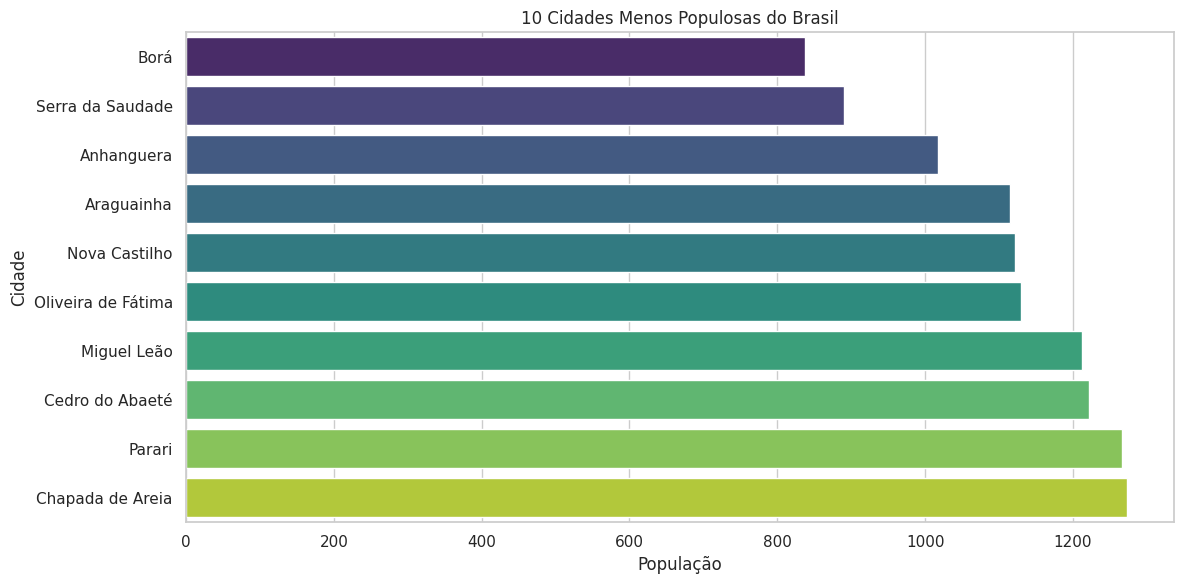

In [ ]:
menos_populosas = brasil_df.nsmallest(10, 'população')

plt.figure(figsize=(12, 6))
sns.barplot(x='população', y='cidade', data=menos_populosas, palette='viridis')
plt.title('10 Cidades Menos Populosas do Brasil')
plt.xlabel('População')
plt.ylabel('Cidade')
plt.tight_layout()
plt.show()


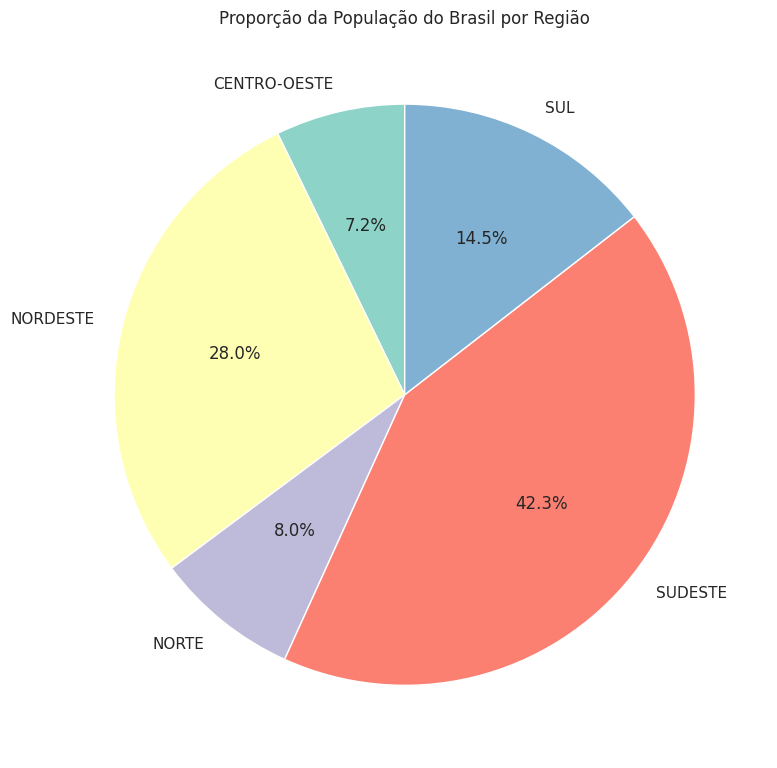

In [ ]:
pop_regiao = brasil_df.groupby('região')['população'].sum()

plt.figure(figsize=(8, 8))
pop_regiao.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Proporção da População do Brasil por Região')
plt.ylabel('')
plt.tight_layout()
plt.show()
